<a href="https://colab.research.google.com/github/ramrajv/Ramraj_Prayag_Kaggle/blob/main/Test/TelecomChurn_Test_051320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis
### Load libraries

In [27]:
# Load libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [28]:
url = 'https://raw.githubusercontent.com/ramrajv/Ramraj_Prayag_Kaggle/main/test%20(1).csv'
test = pd.read_csv(url)

In [29]:
url = 'https://media.githubusercontent.com/media/ramrajv/Ramraj_Prayag_Kaggle/main/train.csv'
train = pd.read_csv(url)

### Check for unique values

In [133]:
df = train.copy()
#df_test = test.copy()

In [134]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
arpu_6,31.277,0.0,60.806,156.362,240.708
arpu_7,87.009,122.787,103.176,205.26,128.191


In [32]:
df.shape

(69999, 172)

In [135]:
dfx = df.drop(['id','churn_probability'], axis = 1)
#dfxt = df_test.drop('id', axis = 1)

In [136]:
dfx.columns[dfx.isna().sum()/dfx.shape[0]>0]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=125)

### Drop null data

#### Drop rows with all null values

In [137]:
dfx.dropna(how = 'all', inplace = True)
#dfxt.dropna(how = 'all', inplace = True)

In [138]:
dfx.shape

(69999, 170)

In [139]:
dfx.sample(5).T

,59659,45337,42342,68239,5561
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
arpu_6,81.585,128.135,120.078,323.328,143.646
arpu_7,194.357,15.693,125.598,204.65,0.0
arpu_8,132.739,28.74,54.087,345.788,-2.0


#### Drop columns with null values in more than 70% of the rows

In [140]:
drop_cols = dfx.columns[dfx.isna().sum()/dfx.shape[0]>0.7]
#drop_colst = dfxt.columns[dfxt.isna().sum()/dfxt.shape[0]>0.7]

In [141]:
drop_cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [142]:
len(drop_cols)

30

In [143]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [144]:
df.groupby('churn_probability')[drop_cols].count().T

churn_probability,0,1
date_of_last_rech_data_6,16057,1511
date_of_last_rech_data_7,16694,1171
date_of_last_rech_data_8,17797,620
total_rech_data_6,16057,1511
total_rech_data_7,16694,1171
total_rech_data_8,17797,620
max_rech_data_6,16057,1511
max_rech_data_7,16694,1171
max_rech_data_8,17797,620
count_rech_2g_6,16057,1511


In [145]:
dfx[drop_cols].sample(5).T

,50617,39932,17131,61154,69056
date_of_last_rech_data_6,NaN,6/23/2014,NaN,NaN,NaN
date_of_last_rech_data_7,NaN,NaN,NaN,NaN,NaN
date_of_last_rech_data_8,NaN,NaN,NaN,NaN,NaN
total_rech_data_6,NaN,1.0,NaN,NaN,NaN
total_rech_data_7,NaN,NaN,NaN,NaN,NaN
total_rech_data_8,NaN,NaN,NaN,NaN,NaN
max_rech_data_6,NaN,177.0,NaN,NaN,NaN
max_rech_data_7,NaN,NaN,NaN,NaN,NaN
max_rech_data_8,NaN,NaN,NaN,NaN,NaN
count_rech_2g_6,NaN,0.0,NaN,NaN,NaN


In [146]:
dfx[dfx[drop_cols]==0][drop_cols].sample(5).T

,55577,48467,21687,9704,64857
date_of_last_rech_data_6,NaN,NaN,NaN,NaN,NaN
date_of_last_rech_data_7,NaN,NaN,NaN,NaN,NaN
date_of_last_rech_data_8,NaN,NaN,NaN,NaN,NaN
total_rech_data_6,NaN,NaN,NaN,NaN,NaN
total_rech_data_7,NaN,NaN,NaN,NaN,NaN
total_rech_data_8,NaN,NaN,NaN,NaN,NaN
max_rech_data_6,NaN,NaN,NaN,NaN,NaN
max_rech_data_7,NaN,NaN,NaN,NaN,NaN
max_rech_data_8,NaN,NaN,NaN,NaN,NaN
count_rech_2g_6,NaN,NaN,0.0,NaN,NaN


In [147]:
dfx[drop_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_last_rech_data_6  17568 non-null  object 
 1   date_of_last_rech_data_7  17865 non-null  object 
 2   date_of_last_rech_data_8  18417 non-null  object 
 3   total_rech_data_6         17568 non-null  float64
 4   total_rech_data_7         17865 non-null  float64
 5   total_rech_data_8         18417 non-null  float64
 6   max_rech_data_6           17568 non-null  float64
 7   max_rech_data_7           17865 non-null  float64
 8   max_rech_data_8           18417 non-null  float64
 9   count_rech_2g_6           17568 non-null  float64
 10  count_rech_2g_7           17865 non-null  float64
 11  count_rech_2g_8           18417 non-null  float64
 12  count_rech_3g_6           17568 non-null  float64
 13  count_rech_3g_7           17865 non-null  float64
 14  count_

In [148]:
dfxfull = dfx.copy()

In [150]:
dfx.drop(drop_cols, axis = 1, inplace = True)

In [151]:
# Check object types in dataframe

obj = dfx.columns[dfx.dtypes=='O']
obj

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [152]:
dfx[obj].sample()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
24945,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/26/2014,8/31/2014


In [153]:
dfx[obj].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   last_date_of_month_6  69999 non-null  object
 1   last_date_of_month_7  69600 non-null  object
 2   last_date_of_month_8  69266 non-null  object
 3   date_of_last_rech_6   68898 non-null  object
 4   date_of_last_rech_7   68765 non-null  object
 5   date_of_last_rech_8   67538 non-null  object
dtypes: object(6)
memory usage: 3.7+ MB


In [155]:
# Fill na values with mode only for date of last recharge.

dfx['date_of_last_rech_6'].fillna(dfx['date_of_last_rech_6'].mode()[0], inplace = True)
dfx['date_of_last_rech_7'].fillna(dfx['date_of_last_rech_7'].mode()[0], inplace = True)
dfx['date_of_last_rech_8'].fillna(dfx['date_of_last_rech_8'].mode()[0], inplace = True)

In [157]:
dfx['date_of_last_rech_6'] = (pd.to_datetime(dfx['date_of_last_rech_6']) - pd.to_datetime(dfx['date_of_last_rech_6'].min())).dt.days
dfx['date_of_last_rech_7'] = (pd.to_datetime(dfx['date_of_last_rech_7']) - pd.to_datetime(dfx['date_of_last_rech_7'].min())).dt.days
dfx['date_of_last_rech_8'] = (pd.to_datetime(dfx['date_of_last_rech_8']) - pd.to_datetime(dfx['date_of_last_rech_8'].min())).dt.days

In [158]:
# Get columns with unique values

dfx.columns[dfx.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [159]:
# Drop columns with a single unique value

dfx.drop(dfx.columns[dfx.nunique()==1], axis = 1, inplace = True)

In [160]:
dfx.shape

(69999, 127)

In [163]:
# Get description on all columns of dataframe

dfx.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780
onnet_mou_8,66296.0,132.978257,311.896596,0.000,6.4100,32.100,115.0600,10752.560
offnet_mou_6,67231.0,198.874771,316.818355,0.000,34.8600,96.480,232.9900,8362.360
offnet_mou_7,67312.0,197.153383,322.482226,0.000,32.2400,91.885,227.6300,7043.980
offnet_mou_8,66296.0,196.543577,324.089234,0.000,31.5750,91.800,229.3450,14007.340
roam_ic_mou_6,67231.0,9.765435,57.374429,0.000,0.0000,0.000,0.0000,2850.980


In [165]:
# Get columns with NA values

na_cols = dfx.columns[dfx.isna().sum()>0]
dfx[na_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
onnet_mou_6,67231.0,133.153275,299.963093,0.0,7.4100,34.110,119.3900,7376.71
onnet_mou_7,67312.0,133.894438,311.277193,0.0,6.6750,32.280,115.8375,8157.78
onnet_mou_8,66296.0,132.978257,311.896596,0.0,6.4100,32.100,115.0600,10752.56
offnet_mou_6,67231.0,198.874771,316.818355,0.0,34.8600,96.480,232.9900,8362.36
offnet_mou_7,67312.0,197.153383,322.482226,0.0,32.2400,91.885,227.6300,7043.98
offnet_mou_8,66296.0,196.543577,324.089234,0.0,31.5750,91.800,229.3450,14007.34
roam_ic_mou_6,67231.0,9.765435,57.374429,0.0,0.0000,0.000,0.0000,2850.98
roam_ic_mou_7,67312.0,7.014568,55.960985,0.0,0.0000,0.000,0.0000,4155.83
roam_ic_mou_8,66296.0,7.004892,53.408135,0.0,0.0000,0.000,0.0000,4169.81
roam_og_mou_6,67231.0,14.186457,73.469261,0.0,0.0000,0.000,0.0000,3775.11


The description shows columns with null values that have outliers. In order to impute these columns, we need to use median to fill NA values. We will fill null values in all columns with median.

In [167]:
dfx[na_cols].fillna(dfx[na_cols].median(), inplace = True)

In [161]:
 # Use only independent variables for check

x = dfx.copy()

In [162]:
x.columns[x.nunique()==2]

Index([], dtype='object')

In [90]:
two_unique = x.columns[x.nunique()==2]
for col in two_unique:
    print(col, x[col].unique())

date_of_last_rech_data_6 [16250. 16251.    nan]
night_pck_user_6 [nan  0.  1.]
night_pck_user_7 [nan  0.  1.]
night_pck_user_8 [nan  0.  1.]
fb_user_6 [nan  1.  0.]
fb_user_7 [nan  1.  0.]
fb_user_8 [nan  1.  0.]


In [92]:
# Get columns where nan percentage is more than 70%

null_cols = x.columns[x.isna().sum()/x.shape[0]*100>=70]
len(null_cols)

29

In [93]:
# get sample of null columns

x[null_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
date_of_last_rech_data_7,17865.0,11.224685,8.822452,0.00,3.0,9.00,18.00,30.00
date_of_last_rech_data_8,18417.0,11.494597,8.908209,0.00,3.0,10.00,19.00,30.00
total_rech_data_6,17568.0,2.467612,2.794610,1.00,1.0,1.00,3.00,61.00
total_rech_data_7,17865.0,2.679989,3.073472,1.00,1.0,2.00,3.00,54.00
total_rech_data_8,18417.0,2.652441,3.101265,1.00,1.0,1.00,3.00,60.00
max_rech_data_6,17568.0,126.500000,109.352573,1.00,25.0,145.00,177.00,1555.00
max_rech_data_7,17865.0,126.402071,109.459266,1.00,25.0,145.00,177.00,1555.00
max_rech_data_8,18417.0,125.374925,109.648799,1.00,25.0,145.00,179.00,1555.00
count_rech_2g_6,17568.0,1.865323,2.566377,0.00,1.0,1.00,2.00,42.00
count_rech_2g_7,17865.0,2.056311,2.799916,0.00,1.0,1.00,2.00,48.00


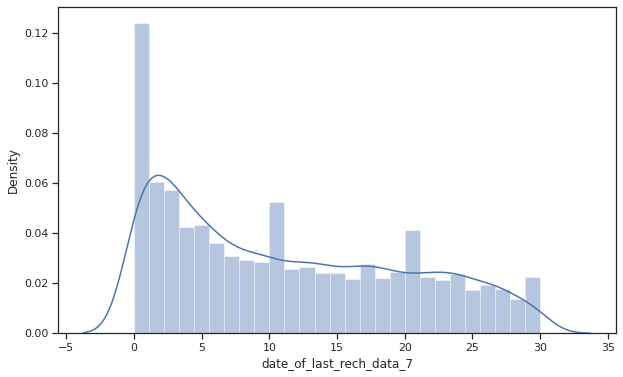

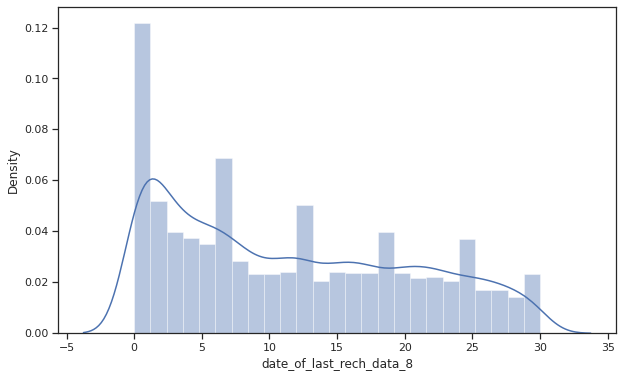

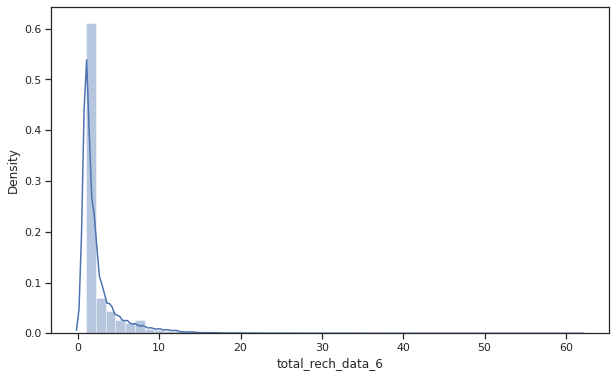

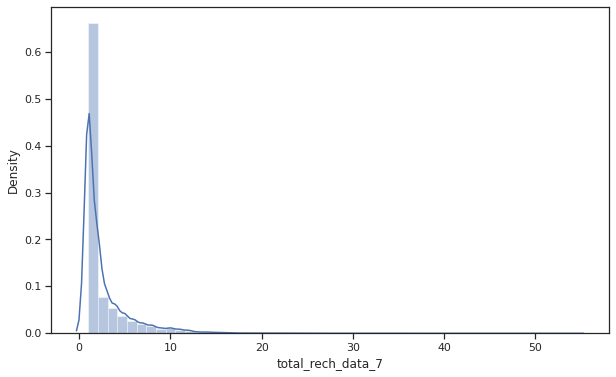

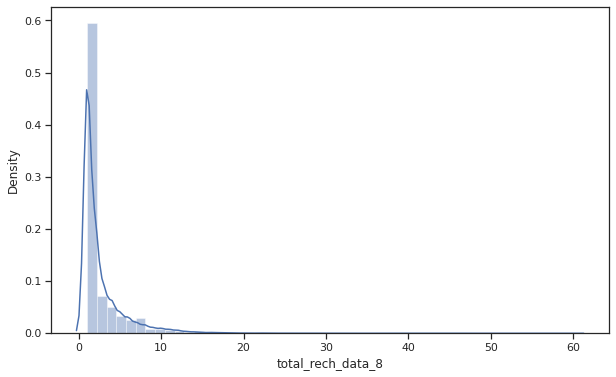

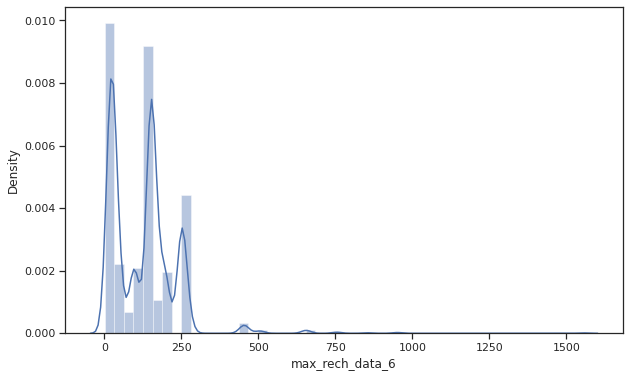

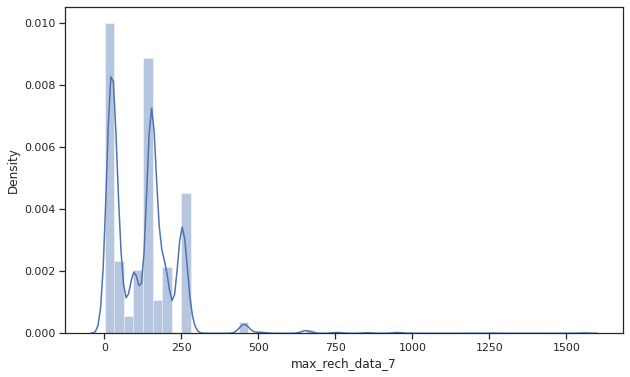

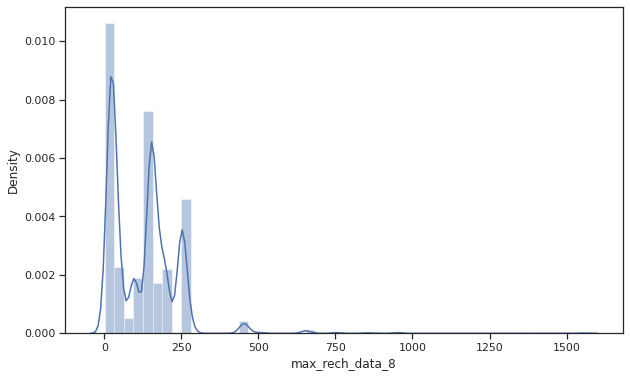

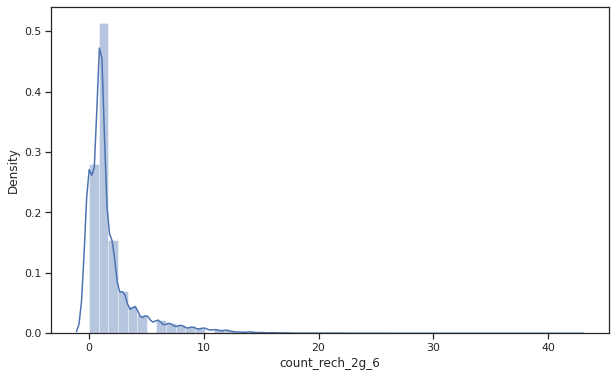

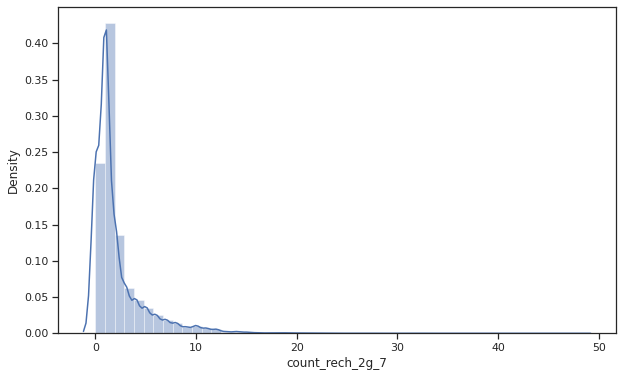

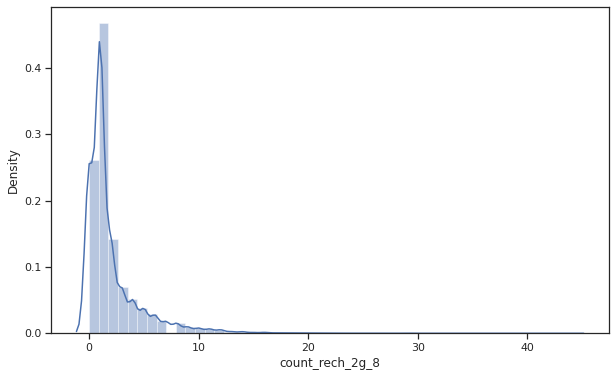

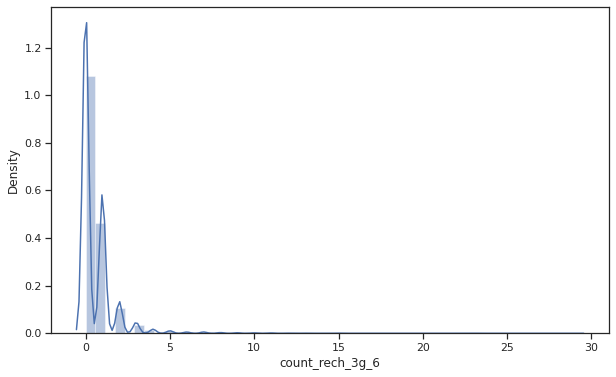

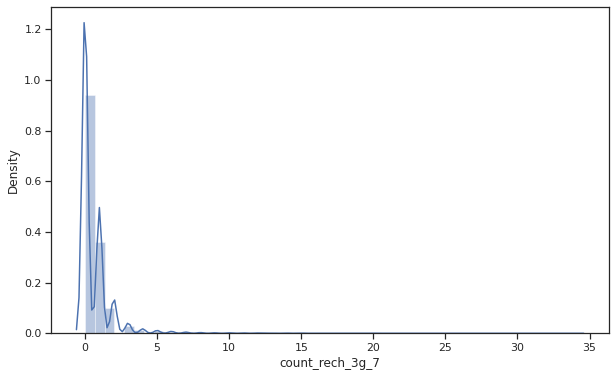

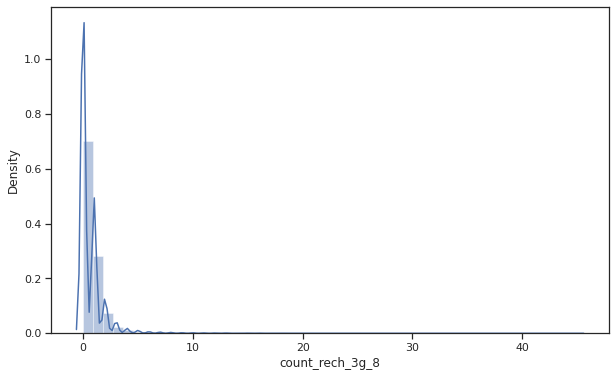

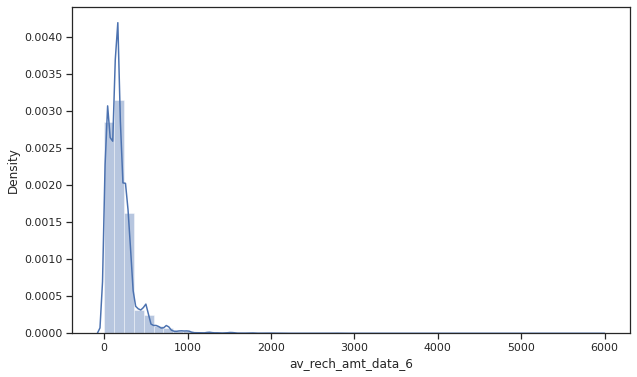

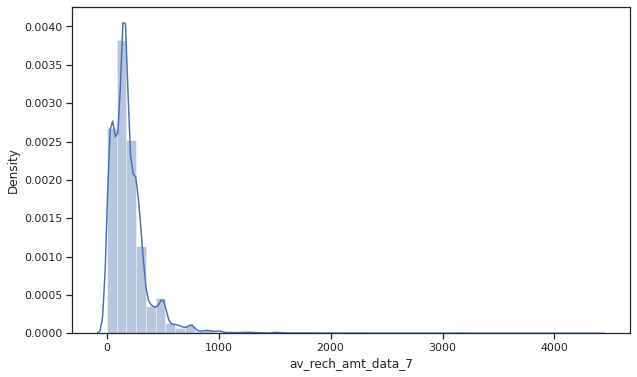

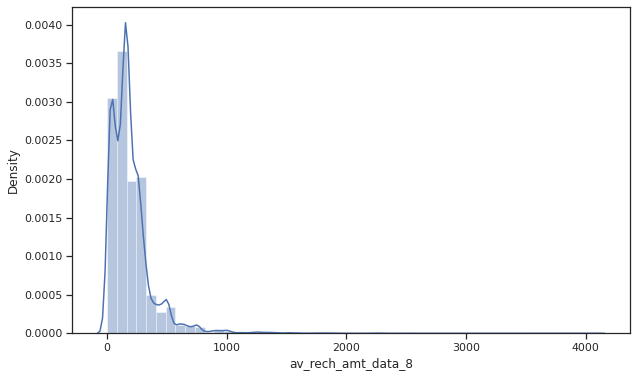

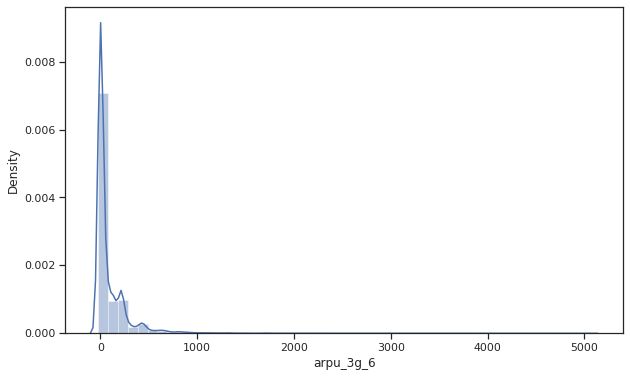

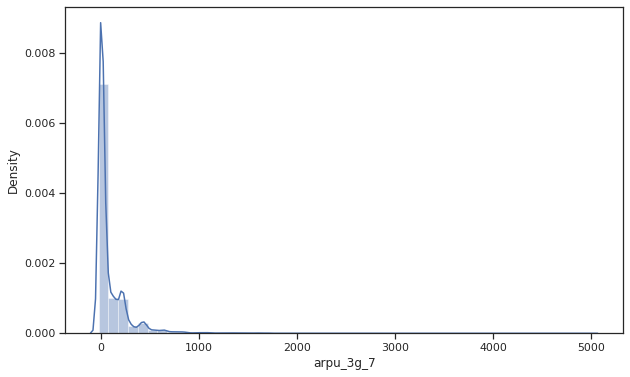

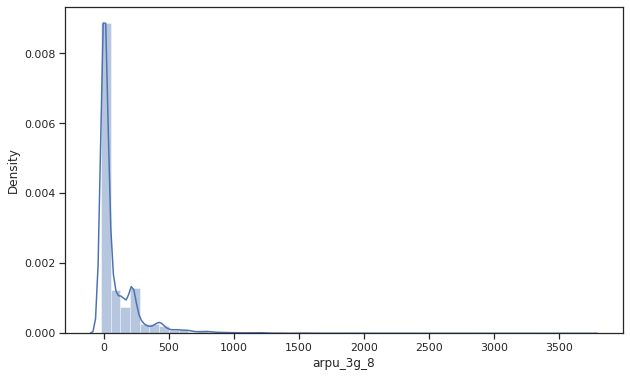

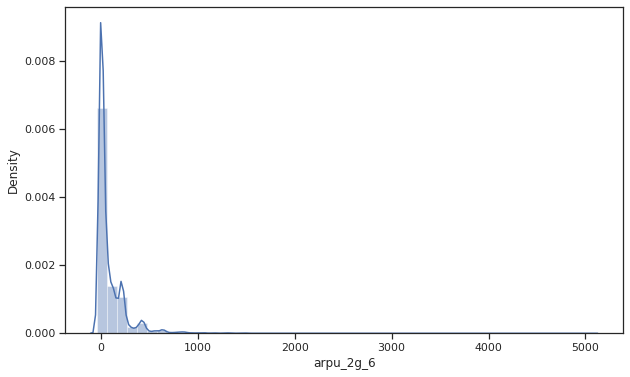

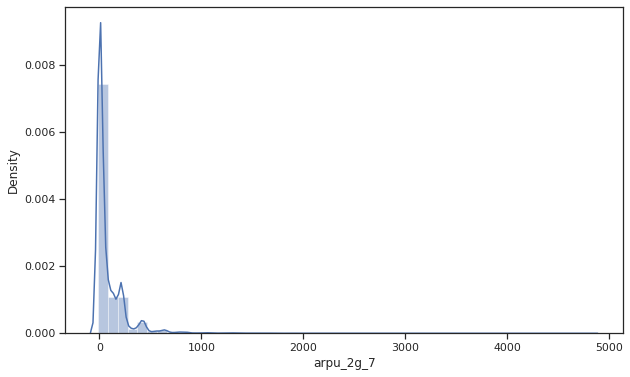

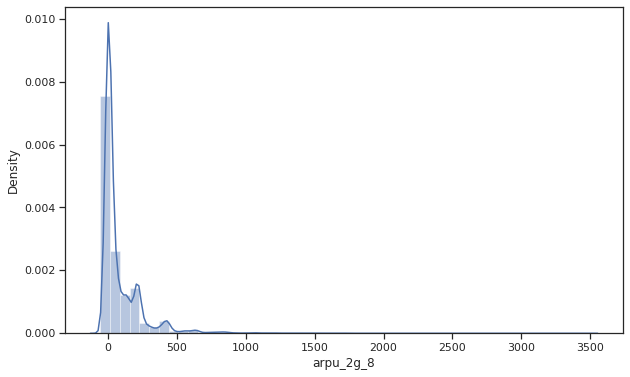

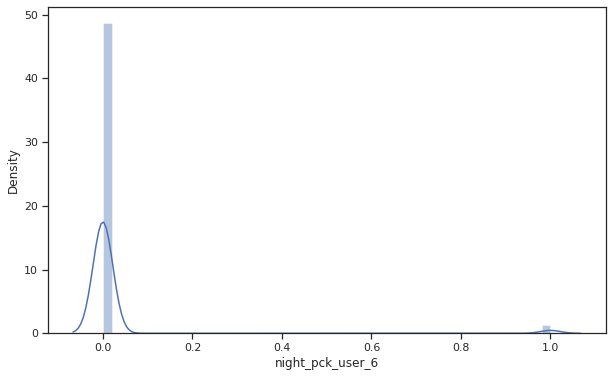

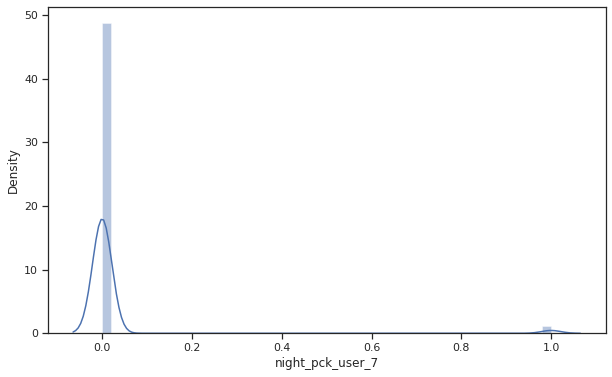

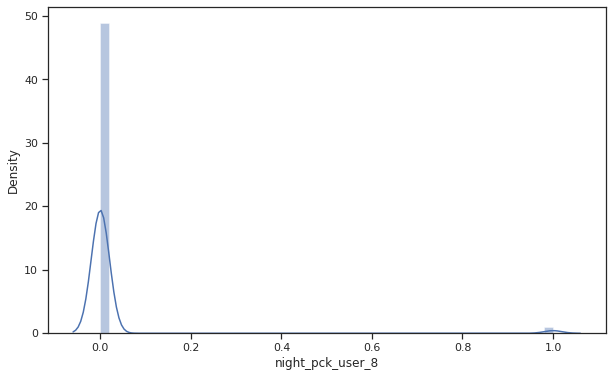

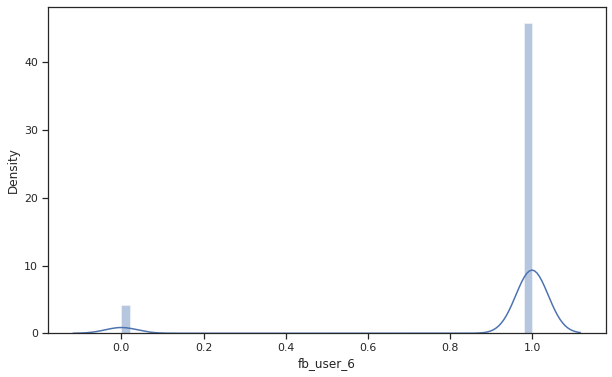

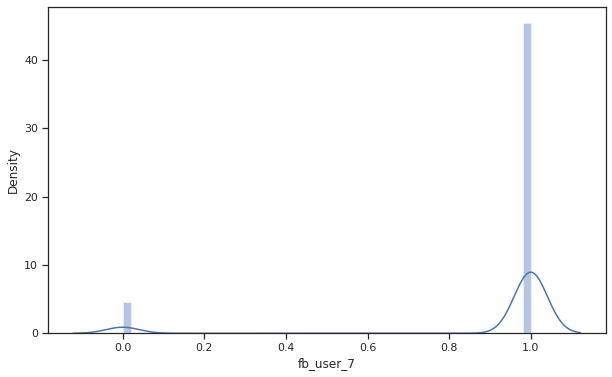

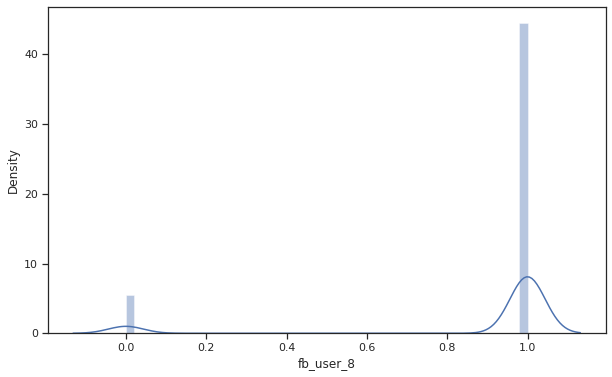

In [103]:
# Plot and verify type of missing

for cols in null_cols:
    plt.figure(figsize = (10,6))
    sns.distplot(x[cols])
    plt.show()

In [104]:
x.drop(null_cols, axis = 1, inplace = True)

In [105]:
x.shape

(69999, 128)

In [106]:
# Find categorical variables

cols = x.columns[x.nunique()<=20]
for col in cols:
  print(col,':',x[col].unique())

date_of_last_rech_data_6 : [16250. 16251.    nan]
monthly_2g_6 : [0 1 2 3 4]
monthly_2g_7 : [0 1 2 4 3 5]
monthly_2g_8 : [0 1 2 4 3 5]
monthly_3g_6 : [0 1 2 4 3 5 6 8 7 9]
monthly_3g_7 : [ 0  1  2  3  5  4  8  6  7 16 14  9 10]
monthly_3g_8 : [ 0  1  2  3  4  8  5  6  9  7 16 10]


In [108]:
x['date_of_last_rech_data_6'].isna().sum()/x.shape[0]*100

1.5728796125658937

In [112]:
cols_with_na = x.columns[x.isna().sum()/x.shape[0]>0]
x[cols_with_na].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   onnet_mou_6               67231 non-null  float64
 1   onnet_mou_7               67312 non-null  float64
 2   onnet_mou_8               66296 non-null  float64
 3   offnet_mou_6              67231 non-null  float64
 4   offnet_mou_7              67312 non-null  float64
 5   offnet_mou_8              66296 non-null  float64
 6   roam_ic_mou_6             67231 non-null  float64
 7   roam_ic_mou_7             67312 non-null  float64
 8   roam_ic_mou_8             66296 non-null  float64
 9   roam_og_mou_6             67231 non-null  float64
 10  roam_og_mou_7             67312 non-null  float64
 11  roam_og_mou_8             66296 non-null  float64
 12  loc_og_t2t_mou_6          67231 non-null  float64
 13  loc_og_t2t_mou_7          67312 non-null  float64
 14  loc_og

In [114]:
x['date_of_last_rech_7'].unique()

array(['7/10/2014', '7/22/2014', '7/21/2014', '7/26/2014', '7/27/2014',
       '7/19/2014', '7/30/2014', '7/16/2014', '7/31/2014', '7/20/2014',
       '7/25/2014', '7/29/2014', '7/28/2014', nan, '7/7/2014',
       '7/18/2014', '7/13/2014', '7/17/2014', '7/12/2014', '7/24/2014',
       '7/15/2014', '7/1/2014', '7/23/2014', '7/9/2014', '7/8/2014',
       '7/14/2014', '7/5/2014', '7/4/2014', '7/11/2014', '7/6/2014',
       '7/2/2014', '7/3/2014'], dtype=object)

In [115]:
x['date_of_last_rech_8'].unique()

array(['8/24/2014', '8/26/2014', '8/25/2014', '8/30/2014', '8/28/2014',
       '8/19/2014', '8/5/2014', '8/27/2014', '8/16/2014', '8/21/2014',
       '8/22/2014', '8/23/2014', nan, '8/15/2014', '8/31/2014',
       '8/12/2014', '8/10/2014', '8/29/2014', '8/20/2014', '8/13/2014',
       '8/18/2014', '8/11/2014', '8/14/2014', '8/6/2014', '8/9/2014',
       '8/8/2014', '8/17/2014', '8/7/2014', '8/1/2014', '8/4/2014',
       '8/2/2014', '8/3/2014'], dtype=object)

In [ ]:
#xt.sachet_3g_8.unique()

In [ ]:
# Store categorical variables.

cat_vars = cols

In [ ]:
#xt.shape

### Get object columns and change data types to int/ float

In [ ]:
#objt = xt.columns[xt.dtypes=='O']
#objt

In [ ]:
obj = x.columns[x.dtypes=='O']
obj

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [ ]:
for element in obj:
  x[element] = pd.to_datetime(x[element])
  #xt[element] = pd.to_datetime(xt[element])

In [ ]:
for element in obj:
  x[element] = (x[element] - x[element].min()).dt.days
  #xt[element] = (xt[element] - xt[element].min()).dt.days

In [ ]:
# x[obj]

### Null value imputation

In [ ]:
x_copy = x.copy()
#xt_copy = xt.copy()

In [ ]:
noncat = x.drop(cat_vars, axis = 1).columns
noncat

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=121)

In [ ]:
n_cat = x[noncat]
#nt_cat = xt[noncat]
med_cols = n_cat[n_cat.columns[abs(n_cat.mean() - n_cat.median())/n_cat.median()>=0.5]].columns
#medt_cols = nt_cat[nt_cat.columns[abs(nt_cat.mean() - nt_cat.median())/nt_cat.median()>=0.5]].columns

In [ ]:
mean_cols = n_cat.drop(med_cols, axis = 1).columns
#meant_cols = nt_cat.drop(medt_cols, axis = 1).columns

In [ ]:
#meant_cols

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imp_mean = imp_mean.fit(x[mean_cols])
imp_med = imp_med.fit(x[med_cols])
x[mean_cols] = imp_mean.transform(x[mean_cols])
x[med_cols] = imp_med.transform(x[med_cols])

#impt_mean = imp_mean.fit(xt[meant_cols])
#impt_med = imp_med.fit(xt[medt_cols])
#xt[meant_cols] = impt_mean.transform(xt[meant_cols])
#xt[medt_cols] = impt_med.transform(xt[medt_cols])

In [ ]:
x.isna().sum()/x.shape[0]

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

In [ ]:
xt.isna().sum()/xt.shape[0]*100

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

In [ ]:
print("printing the count of infinity values")
  
count = np.isinf(x).values.sum()
print("Train dataset contains " + str(count) + " infinite values")

#print("\nprinting the count of infinity values")
  
#count = np.isinf(xt).values.sum()
#print("Test dataset contains " + str(count) + " infinite values")

printing the count of infinity values
Train dataset contains 0 infinite values


In [ ]:
# Check for null values in categorical variables

x[cat_vars].isna().sum()/x[cat_vars].shape[0]*100

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

In [ ]:
# xt[cat_vars].isna().sum()/xt[cat_vars].shape[0]*100

In [ ]:
# xt.columns[xt.dtypes=='O']

## Data Preparation

In [ ]:
x_copy = x.copy()
# xt_copy = xt.copy()

In [ ]:
x.shape

(69999, 127)

In [ ]:
test.shape

(30000, 171)

In [ ]:
xt = test[x.columns]

In [ ]:
obj

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [ ]:
for ele in obj:
    xt[ele] = pd.to_datetime(xt[ele])
    xt[ele] = (xt[ele] - xt[ele].min()).dt.days

In [ ]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
impt_mean = imp_mean.fit(xt[mean_cols])
impt_med = imp_med.fit(xt[med_cols])
xt[mean_cols] = impt_mean.transform(xt[mean_cols])
xt[med_cols] = impt_med.transform(xt[med_cols])

In [ ]:
x.shape

(69999, 127)

In [ ]:
xt.shape

(30000, 127)

In [ ]:
cat_vars

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8'],
      dtype='object')

In [ ]:
for ele in cat_vars:
    print(ele)
    print('x',x[ele].nunique())
    print('xt',xt[ele].nunique())
    print()

monthly_2g_6
x 5
xt 5

monthly_2g_7
x 6
xt 6

monthly_2g_8
x 6
xt 6

monthly_3g_6
x 10
xt 11

monthly_3g_7
x 13
xt 12

monthly_3g_8
x 12
xt 10



In [ ]:
x_all = pd.concat([x,xt])

In [ ]:
x_all.shape

(99999, 127)

In [ ]:
# Get dummies for categorical variables.

x_all = pd.get_dummies(data=x_all, columns=cat_vars, drop_first = True)

In [ ]:
xt = x_all.iloc[-30000:]

In [ ]:
xt.shape

(30000, 171)

In [ ]:
x = x_all.iloc[:-30000]

In [ ]:
x.shape

(69999, 171)

In [ ]:
y = df['churn_probability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 100, stratify=y)

In [ ]:
X_train.shape

(52499, 171)

In [ ]:
y_train.shape

(52499,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_unseen = scaler.transform(xt)

In [ ]:
df_train = pd.DataFrame(X_train, columns = x.columns)

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,52499.0,-2.125599e-16,1.00001,-7.673722,-0.571863,-0.257771,0.263829,82.862033
arpu_7,52499.0,3.390157e-17,1.00001,-4.507347,-0.551752,-0.248822,0.251346,100.261270
arpu_8,52499.0,-1.237023e-17,1.00001,-3.547012,-0.564307,-0.250763,0.267286,96.386162
onnet_mou_6,52499.0,-2.355727e-16,1.00001,-0.436732,-0.409598,-0.321899,-0.053082,24.397195
onnet_mou_7,52499.0,1.088600e-16,1.00001,-0.423414,-0.399921,-0.318668,-0.066635,26.047920
onnet_mou_8,52499.0,-7.604600e-17,1.00001,-0.416496,-0.392808,-0.312192,-0.069142,34.522128
offnet_mou_6,52499.0,1.005966e-16,1.00001,-0.627679,-0.509054,-0.317853,0.096100,26.226389
offnet_mou_7,52499.0,-1.682644e-16,1.00001,-0.610059,-0.502737,-0.320788,0.080447,21.565629
offnet_mou_8,52499.0,-1.830888e-16,1.00001,-0.611006,-0.501262,-0.318439,0.082343,23.164718
roam_ic_mou_6,52499.0,-1.977007e-16,1.00001,-0.166787,-0.166787,-0.166787,-0.166787,49.726234


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85, svd_solver = 'full', random_state = 100)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)
                           # columns = ['pca1','pca2'])

In [ ]:
# pca = PCA(n_components = 2, random_state = 100)
# principalComponents = pca.fit_transform(X_train)
# principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
# principalDf.shape

In [ ]:
# principalDf.columns

In [ ]:
test_components = pca.transform(X_test)
X_test_pca = pd.DataFrame(data = test_components)

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train_pca = principalDf.copy()
logistic=LogisticRegression()
logistic.fit(X=X_train_pca,y=y_train)
logistic.predict(X_test_pca)
score_2=logistic.score(X_test_pca,y_test)
print(score_2)

0.9034285714285715


In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_proba[:,1]))

'0.7'

In [ ]:
pred_proba = logistic.predict_proba(X_test_pca)

In [ ]:
y_pred = np.round(pred_proba[:,1],0)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8981142857142858

In [ ]:
# Transform on unseen data

# pca = PCA(n_components = 2, random_state = 100)
pcomp_unseen = pca.transform(xt)
princDf_unseen = pd.DataFrame(data = pcomp_unseen)

In [ ]:
unseen_predict = logistic.predict(princDf_unseen)
# score_2=logistic.score(princDf_unseen,y_test)
# print(score_2)

In [ ]:
unseen_pred = pd.DataFrame(unseen_predict)

In [ ]:
unseen_pred.groupby(0)[0].count()

0
0    29466
1      534
Name: 0, dtype: int64

In [ ]:
unseen_pred = unseen_pred.reset_index()

In [ ]:
unseen_pred.columns

Index(['index', 0], dtype='object')

In [ ]:
unseen_pred.rename(columns={'index':'id',0:'churn_probability'}, inplace=True)

In [ ]:
unseen_pred.columns

Index(['id', 'churn_probability'], dtype='object')

In [ ]:
unseen_pred['id'] = unseen_pred['id'] + 69999

In [ ]:
unseen_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [ ]:
unseen_pred.to_csv('Ram_Prayag.csv',index = False)

## Test set data preparation

## Support Vector Machine

In [ ]:
import numpy as np
import cvxopt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [ ]:
x['churn_probability'] = df['churn_probability']

In [ ]:
y_train.shape

(48999,)

In [ ]:
X_train.shape

(48999, 168)

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18706,   195],
       [ 1256,   843]])

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

TypeError: ignored

### Logistics Regression
#### Start with RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False  True False False
  True  True False False False False False False False False False False
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False  True  True False  True  True False  True False False False
  True False  True False False  True  True False  True False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

### Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))